In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

cityfile = os.path.join('raw_data', 'city_data.csv')
ridefile = os.path.join('raw_data', 'ride_data.csv')
city = pd.read_csv(cityfile)
ride = pd.read_csv(ridefile)

merged = city.merge(ride, on='city', how='inner')


In [2]:
#filter by city type
rural = merged.loc[merged["type"] == "Rural",:]
urban = merged.loc[merged["type"] == "Urban",:]
suburban = merged.loc[merged["type"] == "Suburban",:]

In [11]:
# Rural Data = Average Fare ($) Per City, Total Number of Rides * Total Number of Drivers

rural_groups = rural.groupby('city')
rural_avfare = rural_groups['fare'].mean()
rural_drivercount = (rural_groups['driver_count'].mean())**2
rural_totalrides = rural_groups['city'].count()

# rural_totalrides

In [4]:
# Urban Data = Average Fare ($) Per City, Total Number of Rides * Total Number of Drivers

urban_groups = urban.groupby('city')
urban_avfare = urban_groups['fare'].mean()
urban_drivercount = (urban_groups['driver_count'].mean())**2 
urban_totalrides = urban_groups['city'].count()

# urban_totalrides

In [5]:
# Suburban Data = Average Fare ($) Per City, Total Number of Rides * Total Number of Drivers
suburban_groups = suburban.groupby('city')
suburban_avfare = suburban_groups['fare'].mean()
suburban_drivercount = (suburban_groups['driver_count'].mean())**2 
suburban_totalrides = suburban_groups['city'].count()

# suburban_totalrides

Text(0,0.5,'Average Fare ($)')

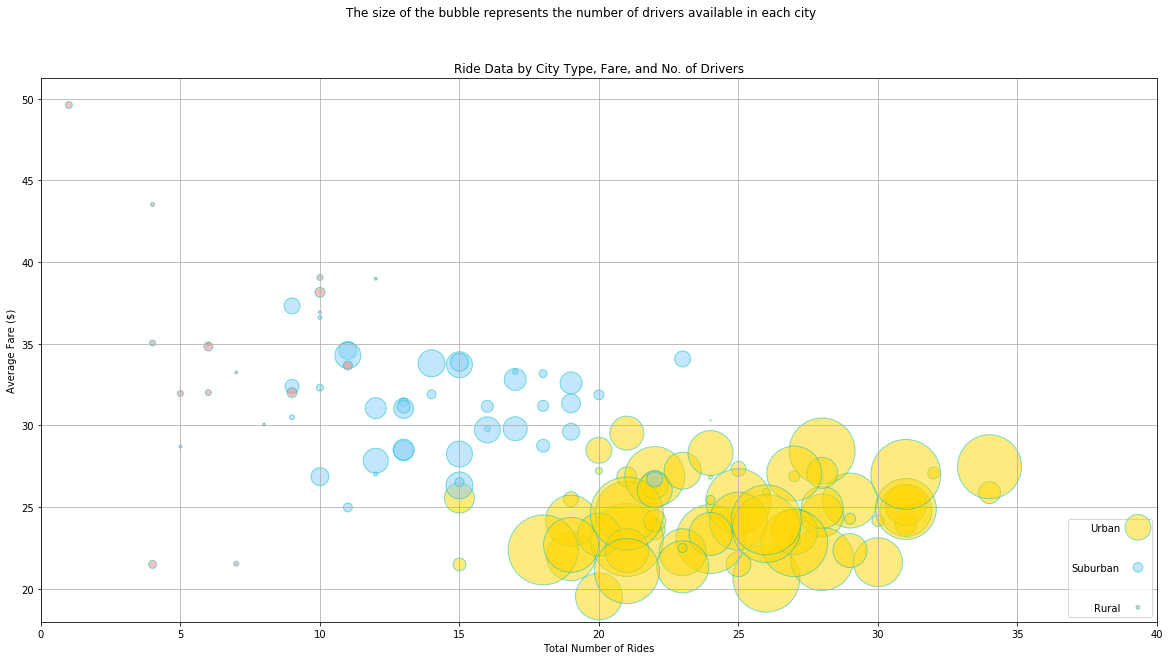

In [7]:
plt.figure(figsize=(20,10))

#urban plot
plt.scatter(urban_totalrides, urban_avfare, c='Gold', edgecolor='cccccc', s=urban_drivercount, alpha=0.5, label = "Urban")
#suburban
plt.scatter(suburban_totalrides, suburban_avfare, c='lightskyblue', edgecolor='cccccc', s=suburban_drivercount, alpha=0.5, label = "Suburban")
#rural
plt.scatter(rural_totalrides,rural_avfare, c='lightcoral',edgecolor='cccccc', s=rural_drivercount, alpha=0.5,label = "Rural")
lgnd = plt.legend(loc='lower right', labelspacing=3, markerfirst=False, scatteryoffsets=[.5], markerscale=.5)

plt.xlim(0, 40)
plt.ylim()
plt.grid(True)
plt.title('Ride Data by City Type, Fare, and No. of Drivers')
plt.suptitle('The size of the bubble represents the number of drivers available in each city')
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")

(-1.25, 1.25, -1.25, 1.25)

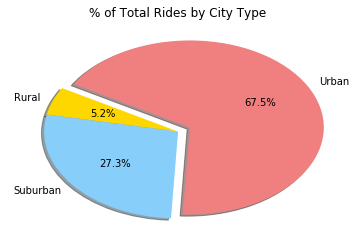

In [35]:

# # * % of Total Fares by City Type

plt.pie(
    (merged.groupby(['type'])['ride_id'].count() * 100).sort_index(),
    explode=[0,0,0.1],
    colors = ["Gold", "LightSkyBlue", 'LightCoral'],
    labels =["Rural", 'Suburban', 'Urban'],
    autopct="%1.1f%%", 
    shadow=True,
    startangle=150
)
plt.title("% of Total Rides by City Type")
plt.axis("off")

(-1.25, 1.25, -1.25, 1.25)

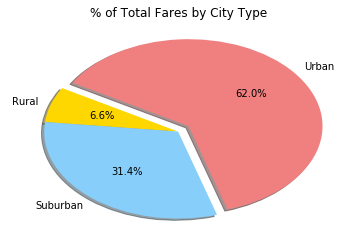

In [36]:
# # * % of Total Fares by City Type

plt.pie(
    (merged.groupby(['type'])['fare'].sum() * 100).sort_index(),
    explode=[0,0,0.1],
    colors = ["Gold", "LightSkyBlue", 'LightCoral'],
    labels =["Rural", 'Suburban', 'Urban'],
    autopct="%1.1f%%", 
    shadow=True,
    startangle=150
)
plt.title("% of Total Fares by City Type")
plt.axis("off")

(-1.25, 1.25, -1.25, 1.25)

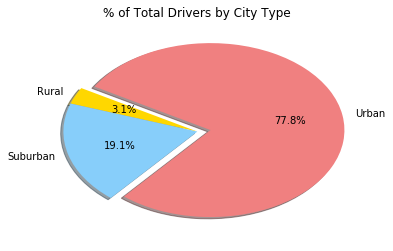

In [29]:
# * % of Total Drivers by City Type
# merged_groupby_data=()
plt.pie(
    (city.groupby('type')['driver_count'].sum()/city['driver_count'].sum() * 100).sort_index(),
    explode=[0,0,0.1],
    colors = ["Gold", "LightSkyBlue", 'LightCoral'],
    labels =["Rural", 'Suburban', 'Urban'],
    autopct="%1.1f%%", 
    shadow=True,
    startangle=150
)
plt.title("% of Total Drivers by City Type")
plt.axis("off")

In [37]:
print( "Three observations:")
print("1. There are far more ubran drivers and riders than any other city type.")
print("2. Rural Fares are on average most expensive. This would make sense seeing as though there are fewer drivers. With fewer drivers (limited supply), the price will drive upwards depending on demand.")
print("3. The downward slope of the fare amount to the number of drivers, in whole, supports observation #2, where as drivers increase price decreases. Interestingly, while Rural drivers make up 3% of the total drivers, they represent 6% of the total fares. Further supporting the supply and demand correlation to the ride price.")

Three observations:
1. There are far more ubran drivers and riders than any other city type.
2. Rural Fares are on average most expensive. This would make sense seeing as though there are fewer drivers. With fewer drivers (limited supply), the price will drive upwards depending on demand.
3. The downward slope of the fare amount to the number of drivers, in whole, supports observation #2, where as drivers increase price decreases. Interestingly, while Rural drivers make up 3% of the total drivers, they represent 6% of the total fares. Further supporting the supply and demand correlation to the ride price.
